# Objetivos

- Entender as relações entre as variáveis explicativas e entre as variáveis explicativas e a resposta.

- Avaliação de criação de variáveis.

# Pacotes e funções

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
%run /home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/99.Funcoes_auxiliares/Funcoes.py

# Leitura da base de treino

In [3]:
dados_full = pd.read_parquet('../1.Base_de_dados/treino.parquet')
dados_full.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
index,,,,,,,,
353955,5.689623,0.347200,1.105109,1,0,0,1,0
4582,58.380209,0.124193,0.334676,1,0,0,1,0
995260,21.729568,2.809812,0.352684,1,0,0,0,0
713182,49.862629,1.040213,0.943036,1,0,0,1,0
309053,13.585701,3.446598,1.715601,1,0,0,0,0


In [4]:
# Volumetria dos dados
dados_full.shape

(783000, 8)

In [5]:
dados = dados_full.sample(frac=0.1, random_state=123)
dados.shape

(78300, 8)

In [6]:
# Avalia duplicidade dos dados
dados.duplicated().sum().sum()

0

In [7]:
# Avalia tipagem dos dados e informação de nulidade de variáveis
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78300 entries, 770916 to 69389
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              78300 non-null  float64
 1   distance_from_last_transaction  78300 non-null  float64
 2   ratio_to_median_purchase_price  78300 non-null  float64
 3   repeat_retailer                 78300 non-null  int64  
 4   used_chip                       78300 non-null  int64  
 5   used_pin_number                 78300 non-null  int64  
 6   online_order                    78300 non-null  int64  
 7   fraud                           78300 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 5.4 MB


## Cria variáveis

In [ ]:
# repeat_retailer * online_order (RROO) = se a transação foi feita online E a transação ocorreu em lojas que já 
# haviam sido visitadas anteriormente então será 1, caso contrário será zero
dados['RROO'] = dados['repeat_retailer'] * dados['online_order']

# repeat_retailer * used_chip (RRUC) = se a transação ocorreu em lojas que já  haviam sido visitadas anteriormente E 
# a transação ocorreu com o uso do chip do cartão de crédito (provávelmente, em local física);
dados['RRUC'] = dados['repeat_retailer'] * dados['used_chip']

## Estudo das variáveis categóricas

### Univariada

In [9]:
# Somente 8,7% das transações são fraudulentas
conta_categorias(df = dados, variavel='fraud')[0], conta_categorias(df = dados, variavel='fraud')[1]

(   fraud  count
 0      0  71585
 1      1   6715,
    fraud     count
 0      0  91.42401
 1      1   8.57599)

In [10]:
# 88% das transações ocorreram em lojas que já haviam sido visitadas anteriormente
conta_categorias(df = dados, variavel='repeat_retailer')[0], conta_categorias(df = dados, variavel='repeat_retailer')[1]

(   repeat_retailer  count
 1                0   9339
 0                1  68961,
    repeat_retailer      count
 1                0  11.927203
 0                1  88.072797)

In [11]:
# 35% das transações ocorreram com o uso do chip do cartão de crédito
conta_categorias(df = dados, variavel='used_chip')[0], conta_categorias(df = dados, variavel='used_chip')[1]

(   used_chip  count
 0          0  50802
 1          1  27498,
    used_chip      count
 0          0  64.881226
 1          1  35.118774)

In [12]:
# 10% das transações ocorreram com o uso do número do PIN
conta_categorias(df = dados, variavel='used_pin_number')[0], conta_categorias(df = dados, variavel='used_pin_number')[1]

(   used_pin_number  count
 0                0  70459
 1                1   7841,
    used_pin_number      count
 0                0  89.985951
 1                1  10.014049)

In [15]:
# 65% das transações ocorreram em pedidos online
conta_categorias(df = dados, variavel='online_order')[0], conta_categorias(df = dados, variavel='online_order')[1]

(   online_order  count
 1             0  27454
 0             1  50846,
    online_order     count
 1             0  35.06258
 0             1  64.93742)

In [ ]:
# 57% das transações ocorreram online e que já ocorreram em lojas que já haviam sido visitadas anteriormente
conta_categorias(df = dados, variavel='RROO')[0], conta_categorias(df = dados, variavel='RROO')[1]

(   RROO  count
 1     0  33533
 0     1  44767,
    RROO      count
 1     0  42.826309
 0     1  57.173691)

In [ ]:
# 30% das transações ocorreram usando chip e que já ocorreram em lojas que já haviam sido visitadas anteriormente
conta_categorias(df = dados, variavel='RRUC')[0], conta_categorias(df = dados, variavel='RRUC')[1]

(   RRUC  count
 0     0  54185
 1     1  24115,
    RRUC      count
 0     0  69.201788
 1     1  30.798212)

### Bivariada: explicativas e target

Busca-se avaliar a distribuição condicional das frequências/probabilidades em relação as variáveis categóricas, compará-las entre os níveis e em relação a distribuição de frequência geral (média da variável target na ausência de outras variáveis).

A probabilidade de ser fraude condicionada a compra ser do mesmo comerciante ou loja (ou de não ser do mesmo comerciante ou loja) é muito próxima da probabilidade ou distribuição de frequência da própria variável target. Ou seja, é provável que a variável repeat_retailer não traga tanto insumo no entendimento de uma transação ser ou não fraudulenta.

In [17]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
repeat_retailer,,
0,0.906307,0.093693
1,0.915314,0.084686
All,0.914240,0.085760


In [18]:
pd.crosstab(dados['repeat_retailer'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
repeat_retailer,,,
0,8464,875,9339
1,63121,5840,68961
All,71585,6715,78300


Diferente da variável anterior, consegue-se notar diferenças na distribuição condicionada das probabilidades da transação ser fraudulenta ou não. Agora, o uso do número PIN se mostra bem vantajoso (desconsiderando outras variáveis) quando se compara sem o uso do PIN e desconsiderando qualquer variável, ou seja, somente a distribuição de frequência da variável target.

É importante salientar que para esta variável, não só a distribuição percentual é baixa, como também a representatividade absoluta é bem baixa para as transações que são fraudulentas e que também usaram o número PIN. Veja a segunda tabela abaixo.

In [19]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_pin_number,,
0,0.905023,0.094977
1,0.997067,0.002933
All,0.914240,0.085760


In [20]:
pd.crosstab(dados['used_pin_number'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_pin_number,,,
0,63767,6692,70459
1,7818,23,7841
All,71585,6715,78300


A probabilidade da transação ser fraudulenta, condicionada que foi feita usando o chip, é menor comparada sem o uso do chip ($~3\%$ menor) e sem considerar a variável chip ($~2\%$ menor). Neste caso, veja que a quantidade absoluta de casos fraudulentos é considerável com e sem o uso do chip.

In [21]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
used_chip,,
0,0.902228,0.097772
1,0.936432,0.063568
All,0.914240,0.085760


In [22]:
pd.crosstab(dados['used_chip'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
used_chip,,,
0,45835,4967,50802
1,25750,1748,27498
All,71585,6715,78300


Na era digital em que vivemos, era de se esperar que a probabilidade de ser uma transação fraudulenta condicionada se o pedido foi online ou não fosse bem diferente. Note que, a probabilidade da transação ser fraudulenta é 12x maior quando o pedido foi feito online, comparado quando não foi feito online. Além disso, percebe-se diferença em relação a distribuição geral de fraudes, ou seja, a frequência de ser uma transação fraudulenta condicionada ao pedido online está 4 p.p. acima da média de fraudes.

In [23]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
online_order,,
0,0.986523,0.013477
1,0.875211,0.124789
All,0.914240,0.085760


In [24]:
pd.crosstab(dados['online_order'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
online_order,,,
0,27084,370,27454
1,44501,6345,50846
All,71585,6715,78300


Transações fraudulentas ocorrem com 4 vezes mais chance quando são feitas na mesma loja que já foi visitada anteriormente e que foi feita de forma online do que quando não foi feita na mesma loja e que não foi feita de forma online.

In [25]:
pd.crosstab(dados['RROO'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
RROO,,
0,0.968717,0.031283
1,0.873434,0.126566
All,0.914240,0.085760


In [26]:
pd.crosstab(dados['RROO'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
RROO,,,
0,32484,1049,33533
1,39101,5666,44767
All,71585,6715,78300


Transações fraudulentas que ocorreram na mesma loja que foi visitada anteriormente e que usou chip é cerca de 3 p.p. menor do que as transações fraudulentas feitas em lojas que não foram visitadas anteriormente e que não foi usado o chip.

In [27]:
pd.crosstab(dados['RRUC'], dados['fraud'], normalize='index', margins=True)

fraud,0,1
RRUC,,
0,0.903700,0.096300
1,0.937922,0.062078
All,0.914240,0.085760


In [28]:
pd.crosstab(dados['RRUC'], dados['fraud'], normalize=False, margins=True)

fraud,0,1,All
RRUC,,,
0,48967,5218,54185
1,22618,1497,24115
All,71585,6715,78300


### Bivariada: entre explicativas categóricas

Busca-se identificar alguma relação entre as variáveis categóricas, identificando alguma concentração em níveis das variáveis explicativas. Aparentemente, nenhuma diferença foi observada.

In [30]:
colunas = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order', 'RROO', 'RRUC']

for i in range(0,len(colunas)):
    for j in range(i+1,len(colunas)):
        print(colunas[i], '+', colunas[j])
        print(pd.crosstab(dados[colunas[i]], dados[colunas[j]], normalize='index', margins=True))
        print('\n')
        print('====================================')
        print('\n')

repeat_retailer + used_pin_number
used_pin_number         0         1
repeat_retailer                    
0                0.895385  0.104615
1                0.900465  0.099535
All              0.899860  0.100140




repeat_retailer + used_chip


used_chip               0         1
repeat_retailer                    
0                0.637756  0.362244
1                0.650310  0.349690
All              0.648812  0.351188




repeat_retailer + online_order
online_order            0         1
repeat_retailer                    
0                0.349074  0.650926
1                0.350836  0.649164
All              0.350626  0.649374




repeat_retailer + RROO
RROO                    0         1
repeat_retailer                    
0                1.000000  0.000000
1                0.350836  0.649164
All              0.428263  0.571737




repeat_retailer + RRUC
RRUC                    0         1
repeat_retailer                    
0                1.000000  0.000000
1                0.650310  0.349690
All              0.692018  0.307982




used_pin_number + used_chip
used_chip               0         1
used_pin_number                    
0                0.648235  0.351765
1                0.653998  0.346002
All            

## Estudo das variáveis numéricas

- 50% das transações estão entre 3.8 a 25.7 unidades de medida, distantes de casa;
- 50% das transações estão entre 0.29 a 3.35 unidades de medida, da última transação e 
- 50% das transações estão entre 0.48 a 2.1 vezes a mediana de compra dos clientes.

In [31]:
dados[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,78300.000000,78300.000000,78300.000000
mean,26.382401,4.918334,1.809581
std,59.821992,21.657937,2.678136
min,0.022599,0.000539,0.008952
25%,3.924027,0.290995,0.479122
50%,10.086565,0.994281,1.002532
75%,25.751608,3.347184,2.083934
max,2522.399266,2119.899612,79.897521


### Univariada

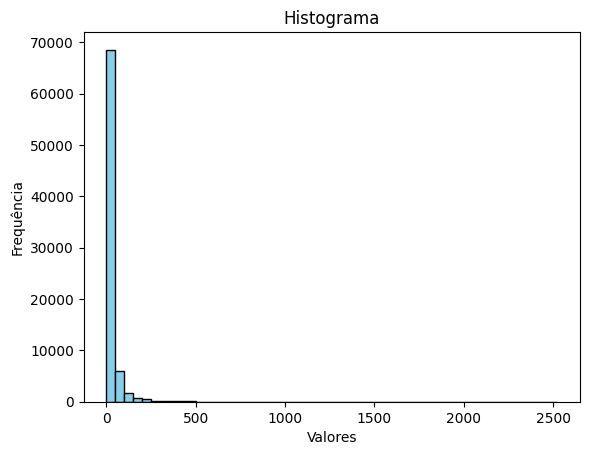

In [32]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_home', bins=50)      

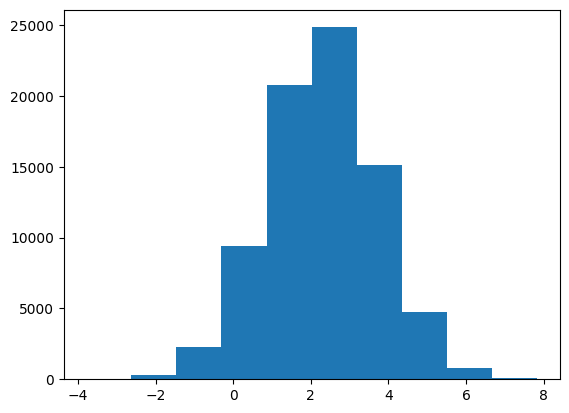

In [33]:
plt.hist(np.log(dados['distance_from_home']))
plt.show()

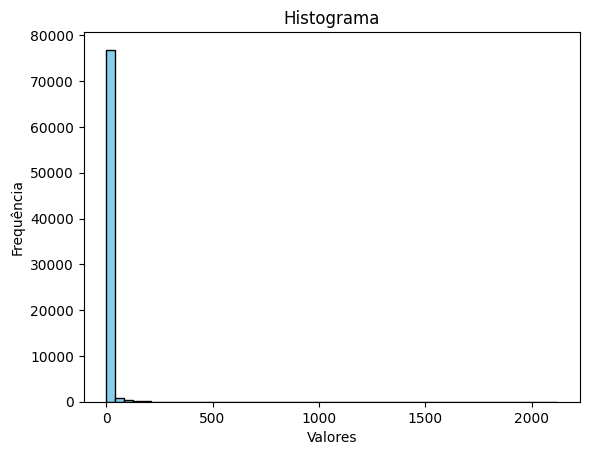

In [34]:
# Muita concentração em distâncias até 1000 unidades de medida
plot_histograma(df=dados, variavel='distance_from_last_transaction', bins=50)

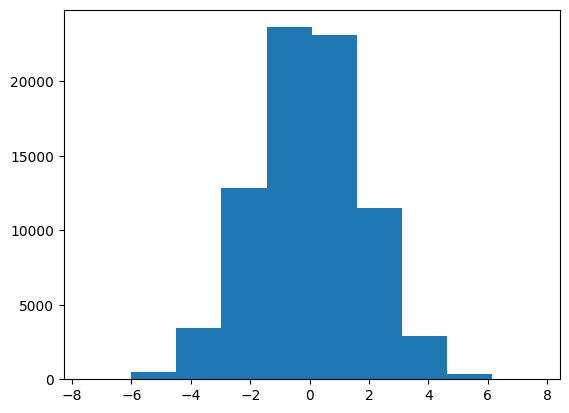

In [35]:
plt.hist(np.log(dados['distance_from_last_transaction']))
plt.show()

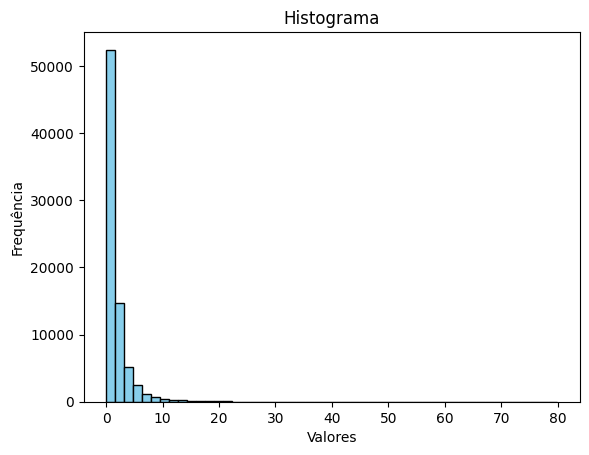

In [36]:
# Muita concentração em valores até 25 vezes a mediana de compras
plot_histograma(df=dados, variavel='ratio_to_median_purchase_price', bins=50)

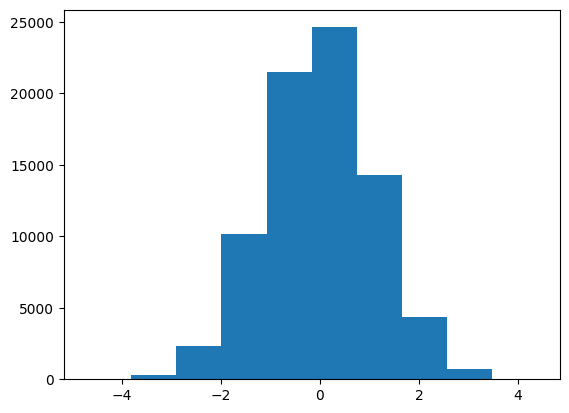

In [37]:
plt.hist(np.log(dados['ratio_to_median_purchase_price']))
plt.show()

### Construção das variáveis numéricas na escala logarítmica

In [38]:
dados['log_distance_from_home'] = np.log(dados['distance_from_home'])
dados['log_distance_from_last_transaction'] = np.log(dados['distance_from_last_transaction'])
dados['log_ratio_to_median_purchase_price'] = np.log(dados['ratio_to_median_purchase_price'])

### Histograma das variáveis numéricas e a variável target

De maneira geral, nota-se que as transações fraudulentas tem um pico na cauda superior direita da distribuição, com destaque para a variável log_ratio_to_median_purchase_price.

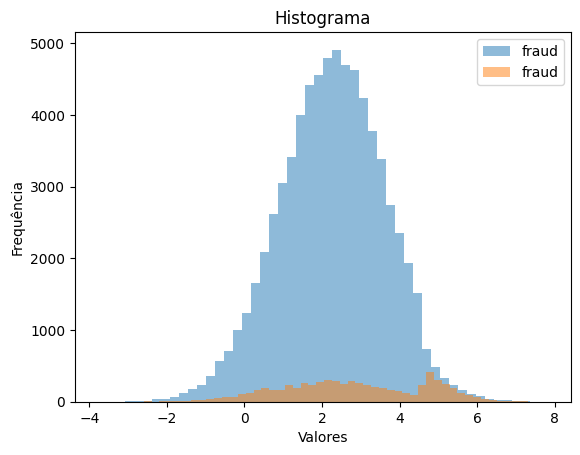

In [39]:
plot_histograma(df=dados, variavel='log_distance_from_home', label='fraud',bins=50)

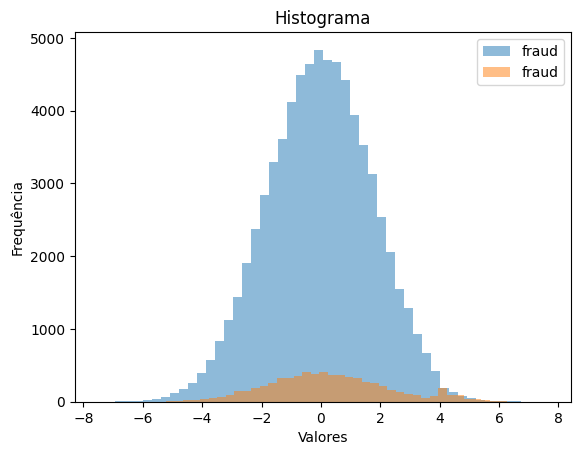

In [40]:
plot_histograma(df=dados, variavel='log_distance_from_last_transaction', label='fraud',bins=50)

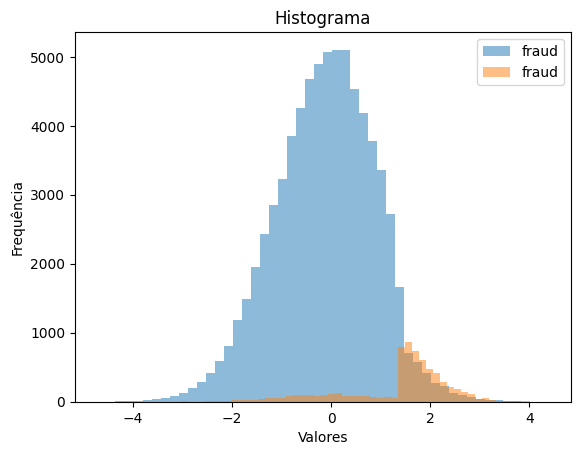

In [41]:
plot_histograma(df=dados, variavel='log_ratio_to_median_purchase_price', label='fraud',bins=50)

### Boxplot das variáveis numéricas com as categóricas

In [42]:
dados.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,RROO,RRUC,log_distance_from_home,log_distance_from_last_transaction,log_ratio_to_median_purchase_price
index,,,,,,,,,,,,,
770916,3.132982,0.136709,0.905399,1,0,0,1,0,1,0,1.141985,-1.989898,-0.099380
122996,20.395077,0.805684,2.582759,1,0,1,1,0,1,0,3.015294,-0.216063,0.948858
59892,55.317530,2.933958,0.573614,1,0,0,1,0,1,0,4.013090,1.076352,-0.555799
592594,378.405321,1.208453,2.182680,1,0,0,1,1,1,0,5.935966,0.189341,0.780553
606400,9.967356,1.027505,0.781084,1,0,0,1,0,1,0,2.299315,0.027133,-0.247073


repeat_retailer + log_distance_from_home


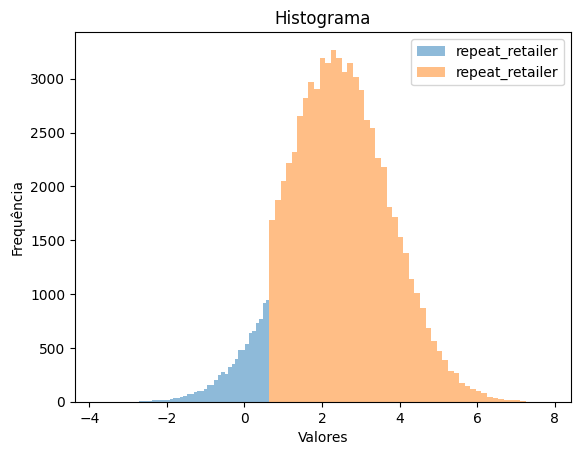





repeat_retailer + log_distance_from_last_transaction


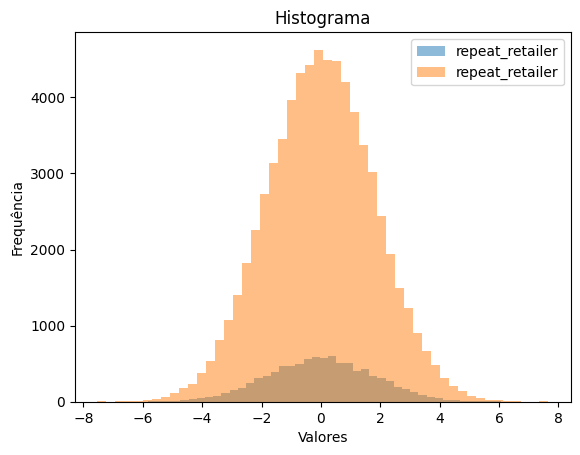





repeat_retailer + log_ratio_to_median_purchase_price


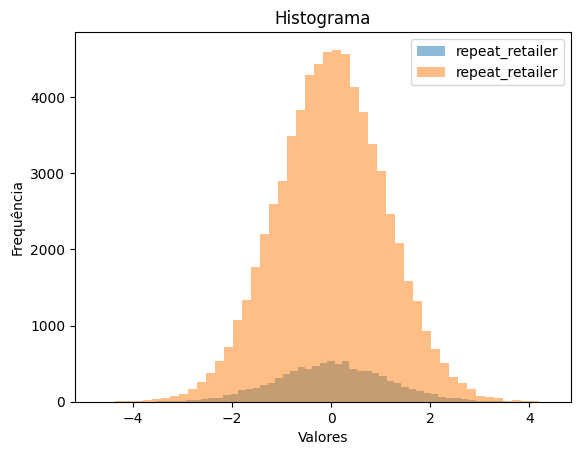





used_pin_number + log_distance_from_home


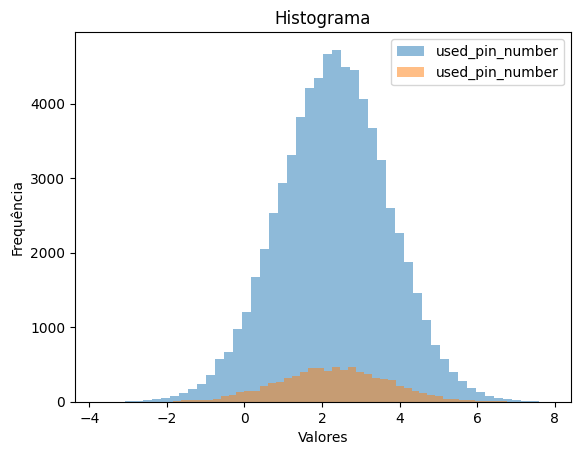





used_pin_number + log_distance_from_last_transaction


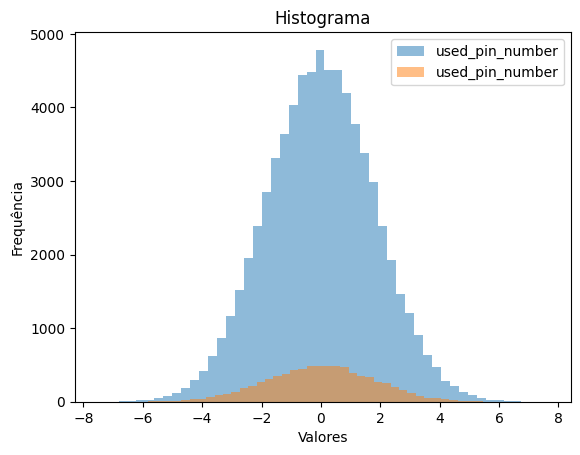





used_pin_number + log_ratio_to_median_purchase_price


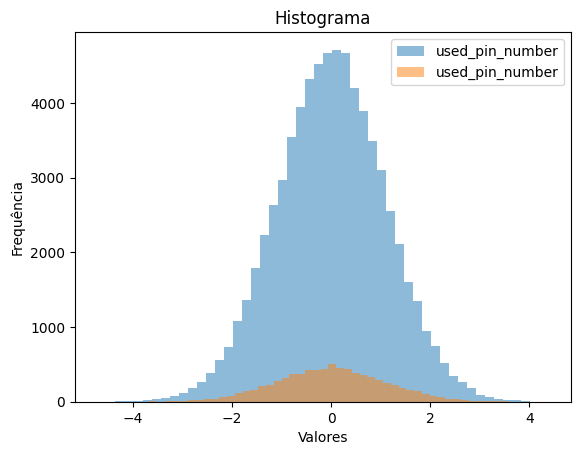





used_chip + log_distance_from_home


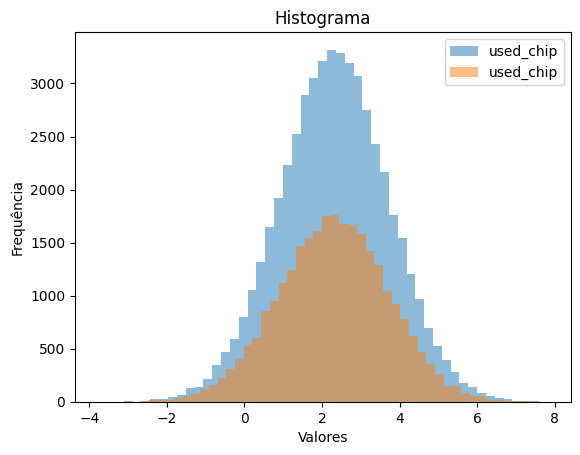





used_chip + log_distance_from_last_transaction


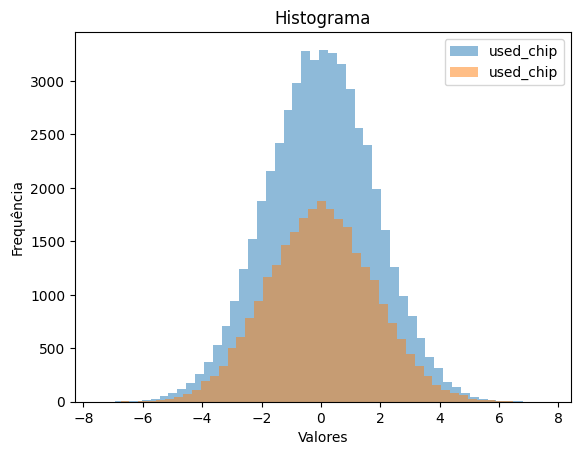





used_chip + log_ratio_to_median_purchase_price


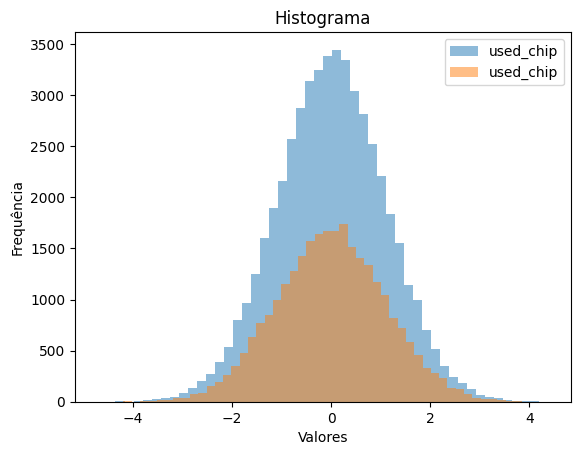





online_order + log_distance_from_home


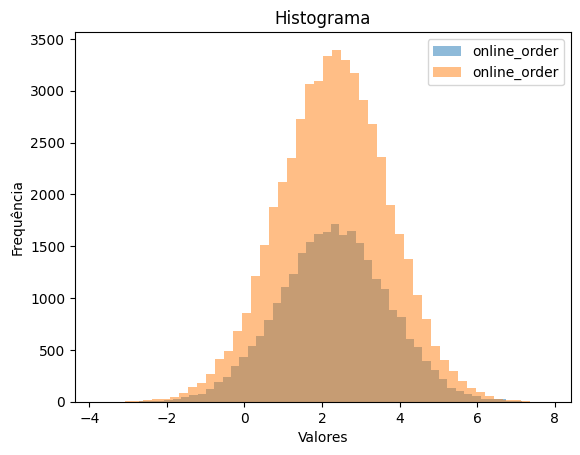





online_order + log_distance_from_last_transaction


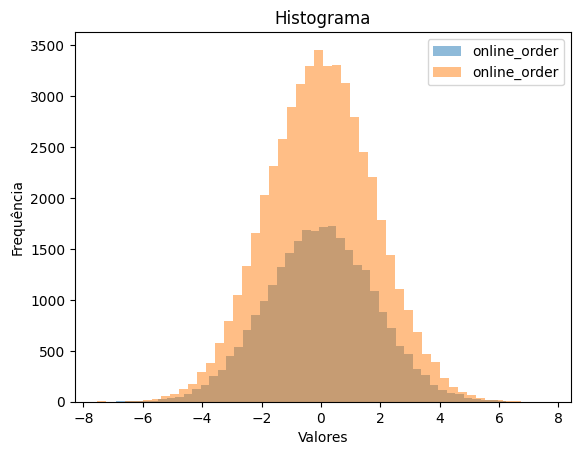





online_order + log_ratio_to_median_purchase_price


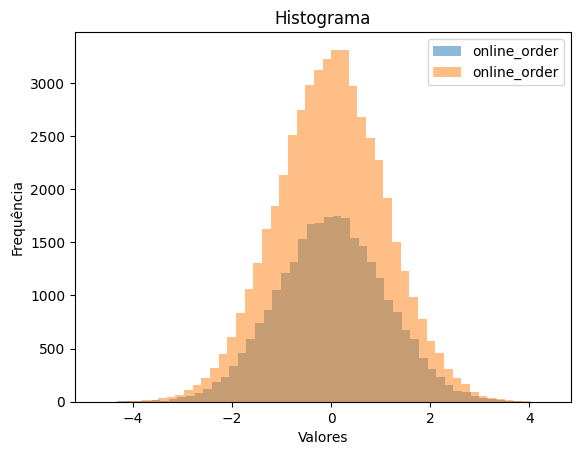





RROO + log_distance_from_home


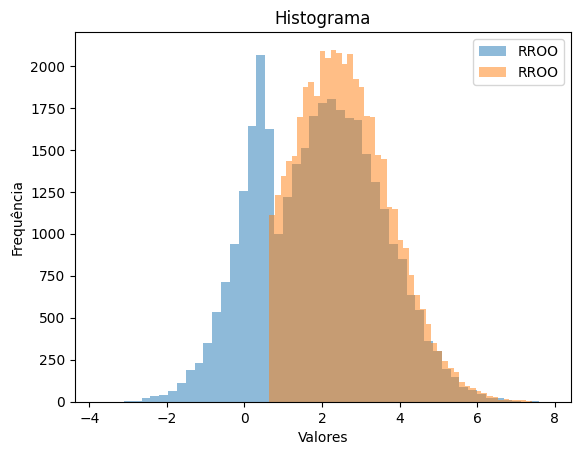





RROO + log_distance_from_last_transaction


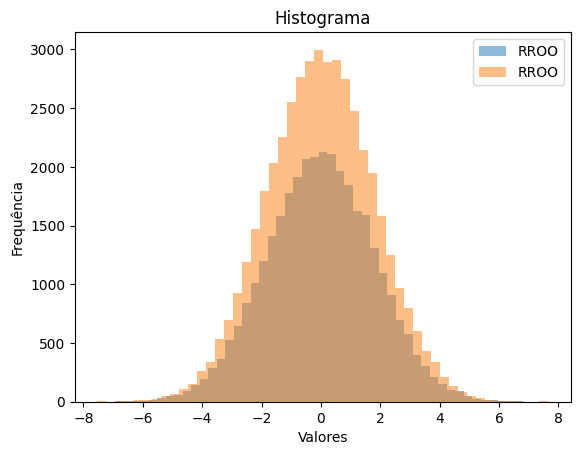





RROO + log_ratio_to_median_purchase_price


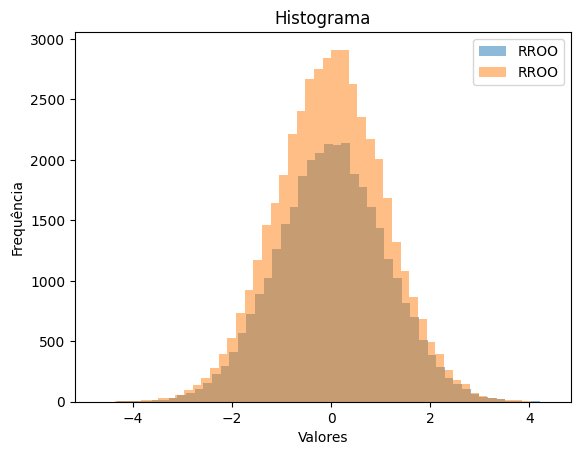





RRUC + log_distance_from_home


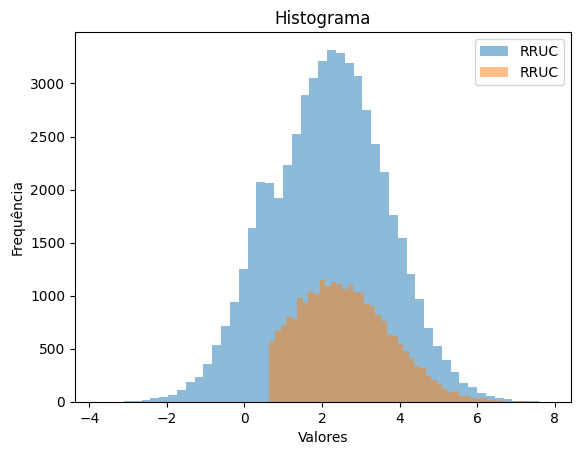





RRUC + log_distance_from_last_transaction


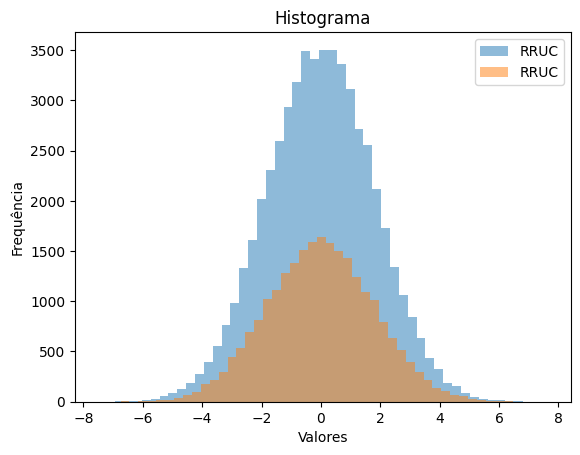





RRUC + log_ratio_to_median_purchase_price


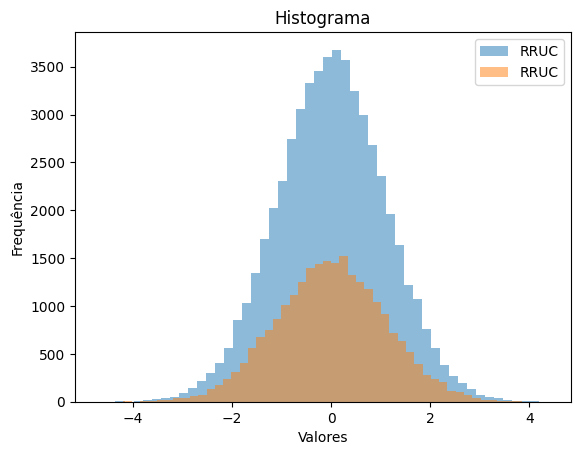

In [43]:
categoricas = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order', 'RROO', 'RRUC']
numericas = ['log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price']

for i in categoricas:
    for j in numericas:
        print(i, '+', j)
        plot_histograma(df=dados, variavel=j, label=i,bins=50)
        print('\n')
        print('====================================')
        print('\n')

### Correlação entre as variáveis numéricas

In [44]:
lista_numericas = ['log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price']

In [45]:
# Nenhuma variável numérica correlacionada com outra
Vars_Correl(dataframe=dados, list_vars_num=lista_numericas, limiar=0.6, metodo='spearman')

,Var1,Var2,Valores


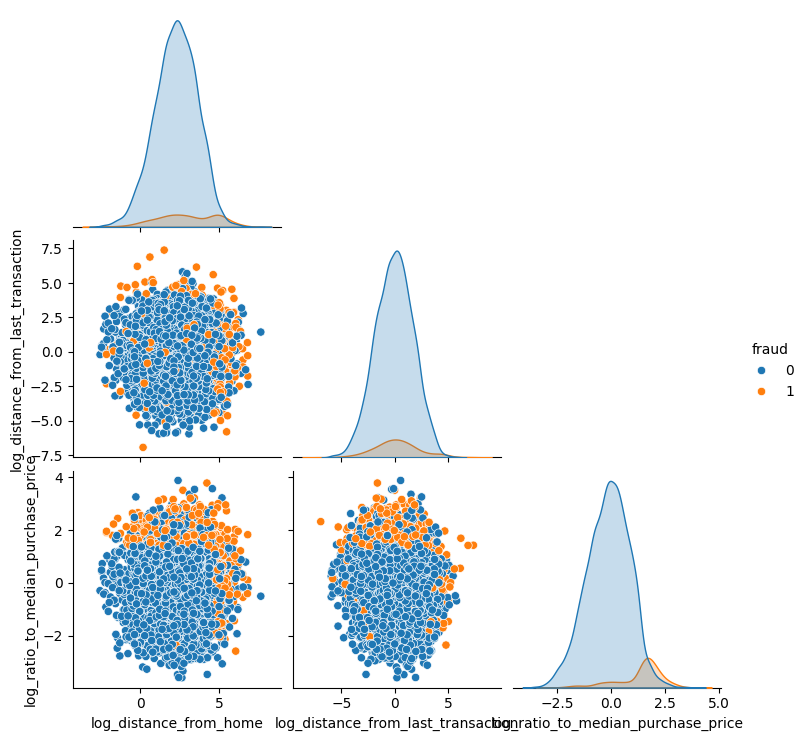

In [46]:
numericas = lista_numericas + ['fraud']
sns.pairplot(dados[numericas].sample(frac=.1, random_state=1234), hue="fraud", corner = True)

<Axes: >

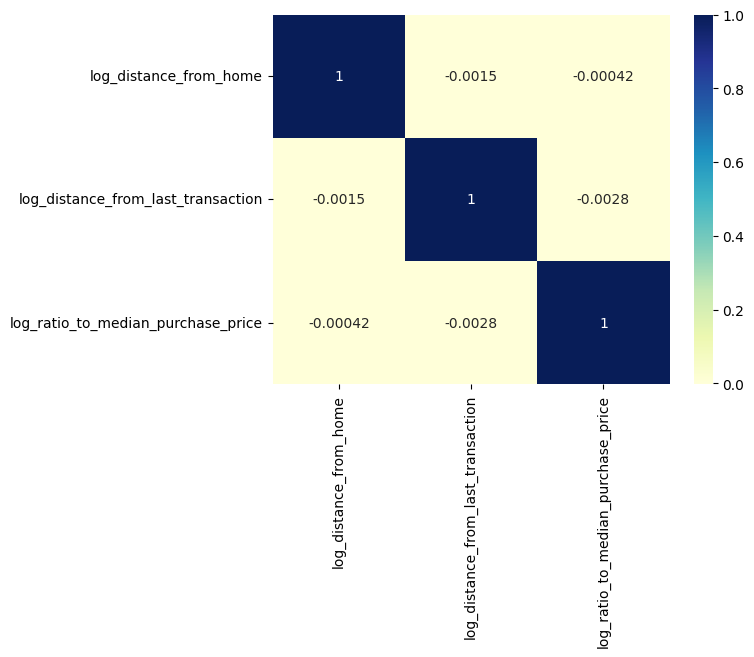

In [47]:
sns.heatmap(dados[lista_numericas].corr(method = 'spearman'), cmap="YlGnBu", annot=True)

### Categorização das variáveis numéricas

In [48]:
cortes_DFH =  Categorizacao(dados, 5, 'log_distance_from_home')
cortes_DFLT = Categorizacao(dados, 5, 'log_distance_from_last_transaction')
cortes_RMPP = Categorizacao(dados, 5, 'log_ratio_to_median_purchase_price')

In [49]:
dados['DFH'] = pd.cut(dados['log_distance_from_home'], bins=cortes_DFH[1], include_lowest=True)
dados['DFLT'] = pd.cut(dados['log_distance_from_last_transaction'], bins=cortes_DFLT[1], include_lowest=True)
dados['RMPP'] = pd.cut(dados['log_ratio_to_median_purchase_price'], bins=cortes_RMPP[1], include_lowest=True)

### Relacionamento de categóricas com numéricas (Pearson)

A correlação de Pearson é invariante a transformações lineares. Aqui, a correlação foi calculada nas variáveis transformadas pelo logarítmo (transformação não linear). Assim, os valores serão diferentes, caso a correlação seja calculada nas variáveis originais.


A correlação ponto-biserial é um caso especial de correlação de Pearson em que uma variável numérica e categórica estão em análise. Veja abaixo, o cálculo do ponto-biserial e do mapa de calor usando a correlação de Pearson. (https://datatab.net/tutorial/point-biserial-correlation)

In [50]:
from scipy.stats import pointbiserialr

In [51]:
pointbiserialr(dados['log_distance_from_home'], dados['repeat_retailer'])

SignificanceResult(statistic=0.6187140796980508, pvalue=0.0)

<Axes: >

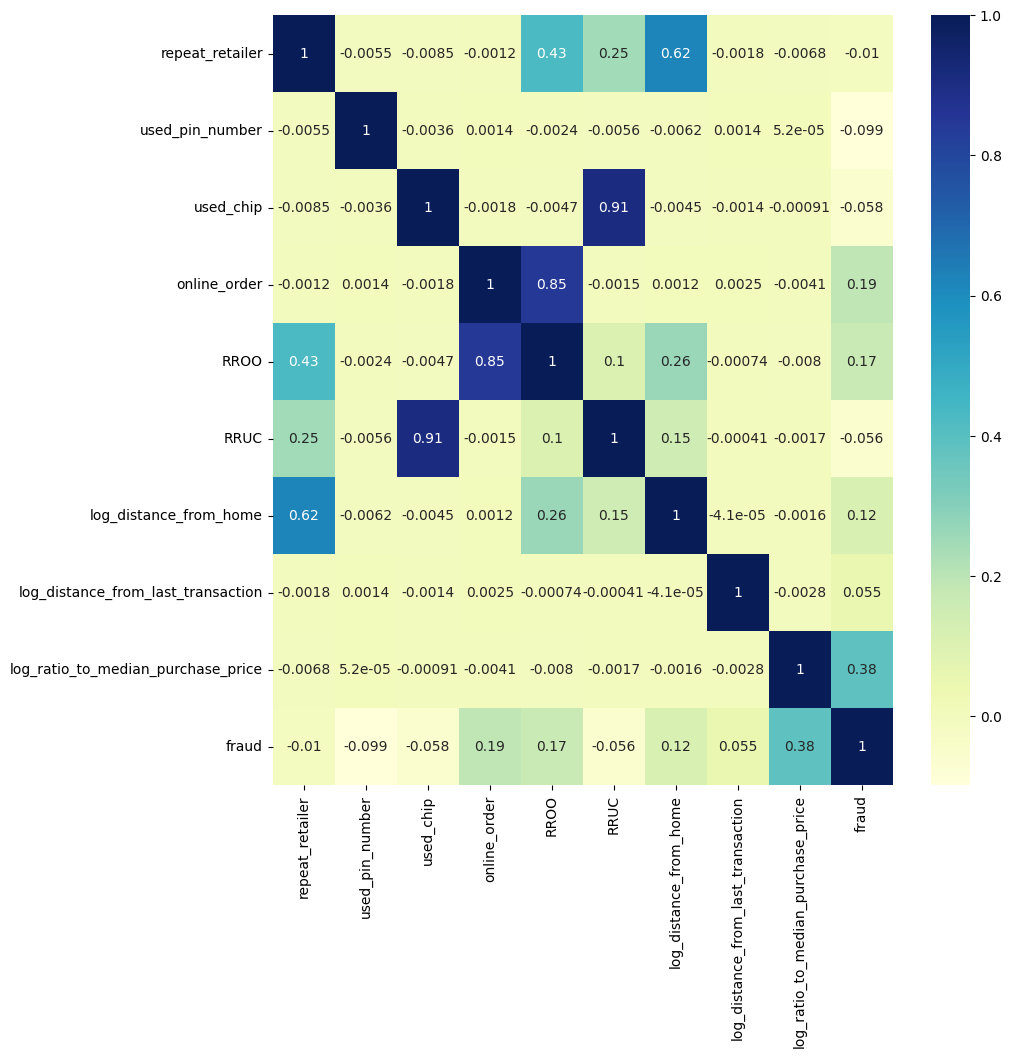

In [53]:
fig, ax = plt.subplots(figsize=(10, 10))
num_cat = ['repeat_retailer', 'used_pin_number', 'used_chip', 'online_order', 'RROO', 'RRUC', 'log_distance_from_home', 'log_distance_from_last_transaction', 'log_ratio_to_median_purchase_price', 'fraud']
sns.heatmap(dados[num_cat].corr(method = 'pearson'), cmap="YlGnBu", annot=True)

# Cálculo do IV das variáveis

In [54]:
dados.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud', 'RROO', 'RRUC',
       'log_distance_from_home', 'log_distance_from_last_transaction',
       'log_ratio_to_median_purchase_price', 'DFH', 'DFLT', 'RMPP'],
      dtype='object')

In [55]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78300 entries, 770916 to 69389
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   distance_from_home                  78300 non-null  float64 
 1   distance_from_last_transaction      78300 non-null  float64 
 2   ratio_to_median_purchase_price      78300 non-null  float64 
 3   repeat_retailer                     78300 non-null  int64   
 4   used_chip                           78300 non-null  int64   
 5   used_pin_number                     78300 non-null  int64   
 6   online_order                        78300 non-null  int64   
 7   fraud                               78300 non-null  int64   
 8   RROO                                78300 non-null  int64   
 9   RRUC                                78300 non-null  int64   
 10  log_distance_from_home              78300 non-null  float64 
 11  log_distance_from_last_trans

In [57]:
vars = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order', 'RROO', 'RRUC', 'DFH', 'DFLT', 'RMPP', 'fraud']
dados_iv = dados[vars]

dados_iv['repeat_retailer'] = dados_iv['repeat_retailer'].astype('category')
dados_iv['used_chip'] = dados_iv['used_chip'].astype('category')
dados_iv['used_pin_number'] = dados_iv['used_pin_number'].astype('category')
dados_iv['online_order'] = dados_iv['online_order'].astype('category')
dados_iv['RROO'] = dados_iv['RROO'].astype('category')
dados_iv['RRUC'] = dados_iv['RRUC'].astype('category')

/tmp/ipykernel_4376/1869626970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_iv['repeat_retailer'] = dados_iv['repeat_retailer'].astype('category')
/tmp/ipykernel_4376/1869626970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_iv['used_chip'] = dados_iv['used_chip'].astype('category')
/tmp/ipykernel_4376/1869626970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [58]:
IV_lista_variaveis(dados = dados_iv, var_target = 'fraud')

,Variaveis,IV
8,RMPP,1.858753
3,online_order,0.758127
4,RROO,0.446718
2,used_pin_number,0.378124
6,DFH,0.182951
1,used_chip,0.046492
5,RRUC,0.044304
7,DFLT,0.022135
0,repeat_retailer,0.001339


## Uso do OptimalBinnig 

In [59]:
from optbinning import OptimalBinning

In [63]:
variable = 'log_distance_from_home'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=10, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.64)",9311,0.118914,8437,874,0.093867,-0.09924,0.001220,0.000152
1,"[0.64, 1.26)",8561,0.109336,7985,576,0.067282,0.262671,0.006768,0.000844
2,"[1.26, 1.63)",6807,0.086935,6385,422,0.061995,0.35016,0.009227,0.001147
3,"[1.63, 1.94)",6235,0.079630,5877,358,0.057418,0.431727,0.012427,0.001541
4,"[1.94, 3.76)",35703,0.455977,33454,2249,0.062992,0.333144,0.044112,0.005489
5,"[3.76, 4.59)",7768,0.099208,7263,505,0.065010,0.299448,0.007862,0.000979
6,"[4.59, inf)",3915,0.050000,2184,1731,0.442146,-2.134083,0.485017,0.051236
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.566634,0.061388


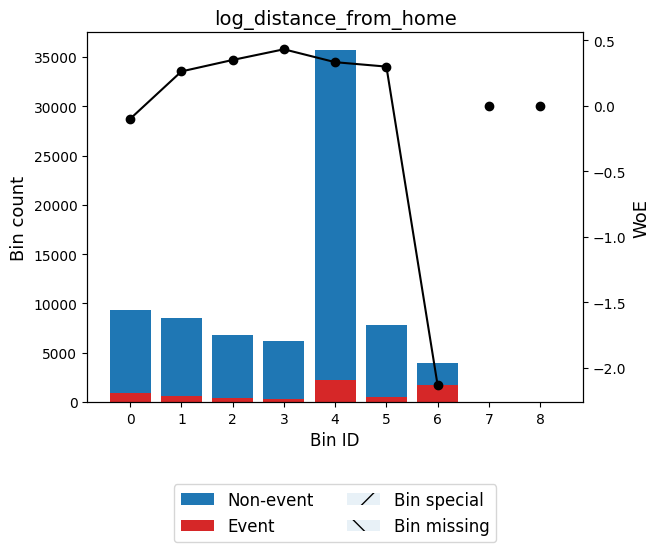

In [64]:
optb.binning_table.plot(metric="woe")

In [65]:
variable = 'log_ratio_to_median_purchase_price'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=10, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.22)",45591,0.582261,44450,1141,0.025027,1.295918,0.584488,0.068343
1,"[0.22, 0.44)",5940,0.075862,5827,113,0.019024,1.576328,0.101786,0.011551
2,"[0.44, 1.07)",14127,0.180421,13777,350,0.024775,1.306281,0.183316,0.021413
3,"[1.07, 1.39)",4685,0.059834,4551,134,0.028602,1.158721,0.050543,0.005987
4,"[1.39, 1.78)",3915,0.050000,1493,2422,0.618646,-2.850348,0.968630,0.091784
5,"[1.78, inf)",4042,0.051622,1487,2555,0.632113,-2.907833,1.046003,0.098201
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,2.934766,0.297278


In [66]:
variable = 'log_distance_from_last_transaction'
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", min_n_bins=3, max_n_bins=10, monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -1.52)",15925,0.203384,14706,1219,0.076546,0.123683,0.002956,0.000369
1,"[-1.52, 1.74)",49476,0.631877,45500,3976,0.080362,0.070894,0.003084,0.000385
2,"[1.74, 2.95)",8984,0.114738,8232,752,0.083704,0.026506,0.000080,0.000010
3,"[2.95, inf)",3915,0.050000,3147,768,0.196169,-0.956127,0.067320,0.008108
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.073440,0.008873


In [68]:
dados['online_order'] = dados['online_order'].astype('category')
dados['used_pin_number'] = dados['used_pin_number'].astype('category')
dados['repeat_retailer'] = dados['repeat_retailer'].astype('category')
dados['used_chip'] = dados['used_chip'].astype('category')
dados['RROO'] = dados['RROO'].astype('category')
dados['RRUC'] = dados['RRUC'].astype('category')

In [69]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78300 entries, 770916 to 69389
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   distance_from_home                  78300 non-null  float64 
 1   distance_from_last_transaction      78300 non-null  float64 
 2   ratio_to_median_purchase_price      78300 non-null  float64 
 3   repeat_retailer                     78300 non-null  category
 4   used_chip                           78300 non-null  category
 5   used_pin_number                     78300 non-null  category
 6   online_order                        78300 non-null  category
 7   fraud                               78300 non-null  int64   
 8   RROO                                78300 non-null  category
 9   RRUC                                78300 non-null  category
 10  log_distance_from_home              78300 non-null  float64 
 11  log_distance_from_last_trans

In [77]:
variable = 'online_order'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],27454,0.350626,27084,370,0.013477,1.926654,0.622785,0.067676
1,[1],50846,0.649374,44501,6345,0.124789,-0.418697,0.135343,0.016795
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.758127,0.084472


In [76]:
variable = 'used_pin_number'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],7841,0.10014,7818,23,0.002933,3.462148,0.366253,0.031369
1,[0],70459,0.89986,63767,6692,0.094977,-0.112219,0.011871,0.001483
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.00000,71585,6715,0.085760,,0.378124,0.032852


In [ ]:
variable = 'repeat_retailer'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],68961,0.880728,63121,5840,0.084686,0.013781,0.000166,0.000021
1,[0],9339,0.119272,8464,875,0.093693,-0.097188,0.001173,0.000147
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.001339,0.000167


In [78]:
variable = 'used_chip'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],27498,0.351188,25750,1748,0.063568,0.323421,0.032148,0.004001
1,[0],50802,0.648812,45835,4967,0.097772,-0.14431,0.014344,0.001791
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.046492,0.005793


In [79]:
variable = 'RROO'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[0],33533,0.428263,32484,1049,0.031283,1.066369,0.317314,0.037886
1,[1],44767,0.571737,39101,5666,0.126566,-0.434877,0.129404,0.016049
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.446718,0.053935


In [80]:
variable = 'RRUC'
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp", monotonic_trend="auto")
optb.fit(dados[variable], dados['fraud'])
optb.binning_table.build()

/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git_GitHub/Estudo_Fraude_CC/vFraude_CC/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/hugo/Documents/Git

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],24115,0.307982,22618,1497,0.062078,0.348741,0.032442,0.004035
1,[0],54185,0.692018,48967,5218,0.096300,-0.127509,0.011862,0.001482
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,78300,1.000000,71585,6715,0.085760,,0.044304,0.005517
